# Credit Risk Assessment Model

## Introduction

Welcome to the "Credit Risk Assessment Model" project! In this project, we aim to build a machine learning model that assesses the credit risk of loan applicants. This model will help us identify individuals who are likely to default on their credit, enabling us to take preventive measures to minimize financial losses for our bank.

## Problem Statement

The problem we're addressing is critical for our financial institution. When customers default on their credit, it leads to substantial financial losses. To mitigate this risk, we need to develop a predictive model that can evaluate the creditworthiness of loan applicants. By analyzing historical data and various features, we will predict whether an individual is likely to default on their credit.


Throughout this journey, we will document our progress, insights, and findings. Let's dive into the data and begin the process of building our credit risk assessment model.


First, we import necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Step 2: Data Import and Overview

In this section, we'll start by importing the dataset for our "Credit Risk Assessment Model" project. We'll provide a brief overview of the dataset, including the number of rows and columns, and highlight any initial observations or data quality issues that we identify.


In [2]:
# Import the dataset
df = pd.read_csv("german_credit_data.csv")

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


### Dataset Overview
Now that we have successfully imported the dataset, let's take a closer look at it:

- Number of Rows: 1000
- Number of Columns: 10

### Initial Observations
Here are some initial observations and notes regarding the dataset:

- The dataset contains information about loan applicants.
- It includes features such as age, gender, job type, housing status, savings account status, checking account status, credit amount, loan duration, and loan purpose.
- We will explore and analyze this data to build a credit risk assessment model.
This dataset will serve as the foundation for our project, and we'll proceed with the next step, which is exploratory data analysis (EDA), to gain deeper insights into the data.

Let's continue with our journey to assess credit risk and build our predictive model.

# Step 3: Exploratory Data Analysis (EDA)
This section sets the stage for your exploratory data analysis (EDA) and provides the audience with the initial context of your dataset and project.


Here we look for any abnormalities in range that may signal innacurate data or a strange value used to indicate a null.

In [4]:
# Display the first few rows
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Now, we check for column data types and count null values.

In [5]:
# Get data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


Next, check the number of unique elements in each variable. This is useful for determining categorical versus continuous variables.

In [6]:
# Get basic statistics
df.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64

Looks like we have no nulls and the values are all in check, everything looks good!

## Creating the Target Variable

We are creating a binary target variable, "Default," which indicates whether an individual is likely to default on their credit. The criterion used is based on the credit amount exceeding a threshold.

If "Credit amount" is greater than the threshold (e.g., $5,000), we consider it "likely to default" (1); otherwise, it's "not likely to default" (0).

Let's implement this in code.

## Class Imbalance Check

Let's examine the distribution of our target variable and assess whether there is an imbalance between the classes. This information will be crucial as we progress with building our credit risk assessment model.
In our case, the target variable might be related to credit default or non-default

In [7]:
# Define a function to create the binary target variable
def create_target_variable(row):
    # Define your criteria for determining default
    # Example criteria: If credit amount > threshold, it's likely to default
    threshold = 5000  # You can adjust this threshold as needed
    if row['Credit amount'] > threshold:
        return 1  # Likely to default
    else:
        return 0  # Not likely to default

# Apply the function to create the target variable
df['Default'] = df.apply(create_target_variable, axis=1)


**Outcome:**

The "Default" column has been added to our dataset, and each entry now contains a 0 or 1 to indicate the likelihood of default. We will use this target variable in our credit risk assessment model.


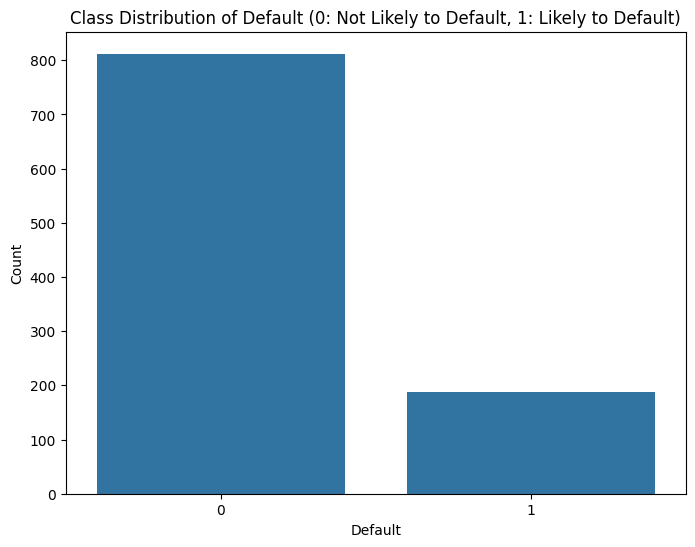

In [8]:
# Create a count plot to visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Default')
plt.title('Class Distribution of Default (0: Not Likely to Default, 1: Likely to Default)')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()


In [9]:
# Calculate the percentage of individuals likely to default (1)
percentage_likely_to_default = (df['Default'] == 1).sum() / len(df) * 100
print(f"Percentage of Individuals Likely to Default: {percentage_likely_to_default:.2f}%")


Percentage of Individuals Likely to Default: 18.80%


In [10]:
# Get the class distribution of the "Default" variable
class_distribution = df['Default'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
Default
0    812
1    188
Name: count, dtype: int64


Looks like there is an imbalance! Only 18.8% of application defaulted.



Let's look at the distirbutions of the other variables.

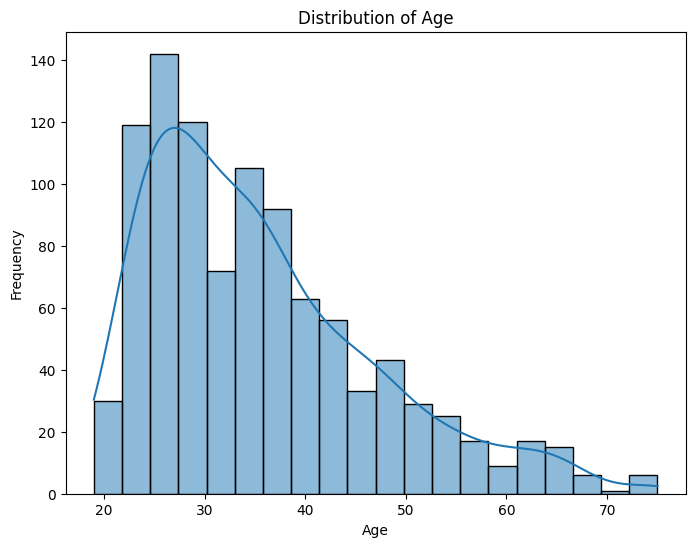

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

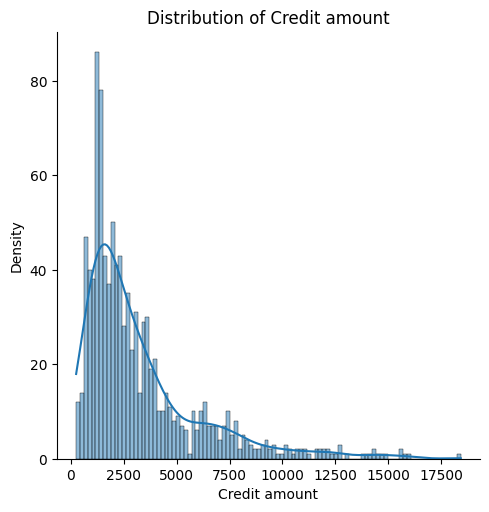

In [12]:
# Visualize the distribution of Credit amount
plt.figure(figsize=(8, 6))
sns.displot(df['Credit amount'], bins=100, kde=True)
plt.title('Distribution of Credit amount')
plt.xlabel('Credit amount')
plt.ylabel('Density')
plt.show()


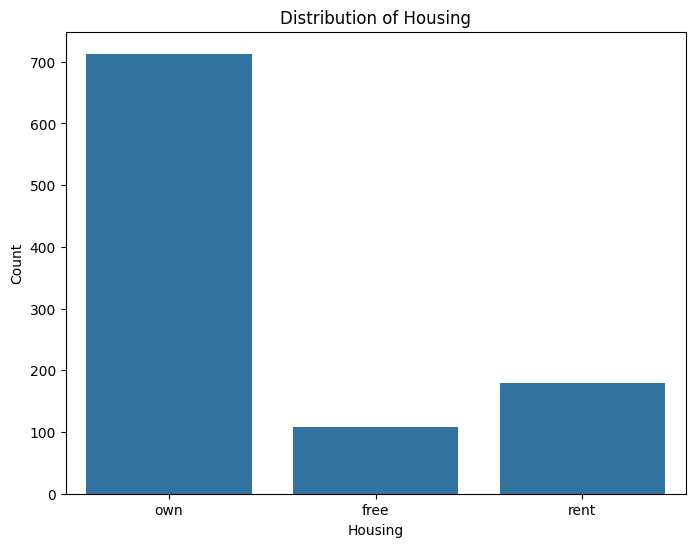

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Housing')
plt.title('Distribution of Housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.show()

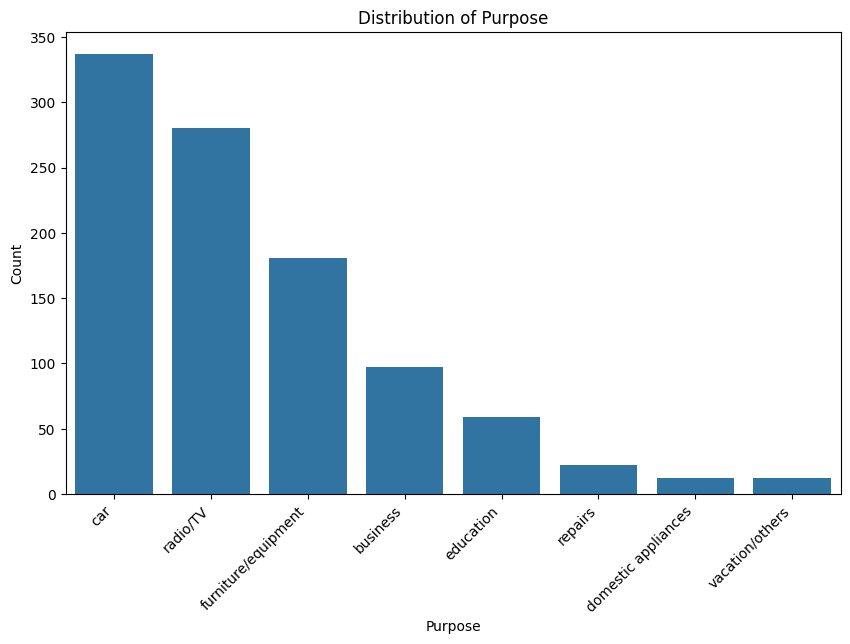

In [14]:
# Visualize the distribution of Purpose
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Purpose', order=df['Purpose'].value_counts().index)
plt.title('Distribution of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


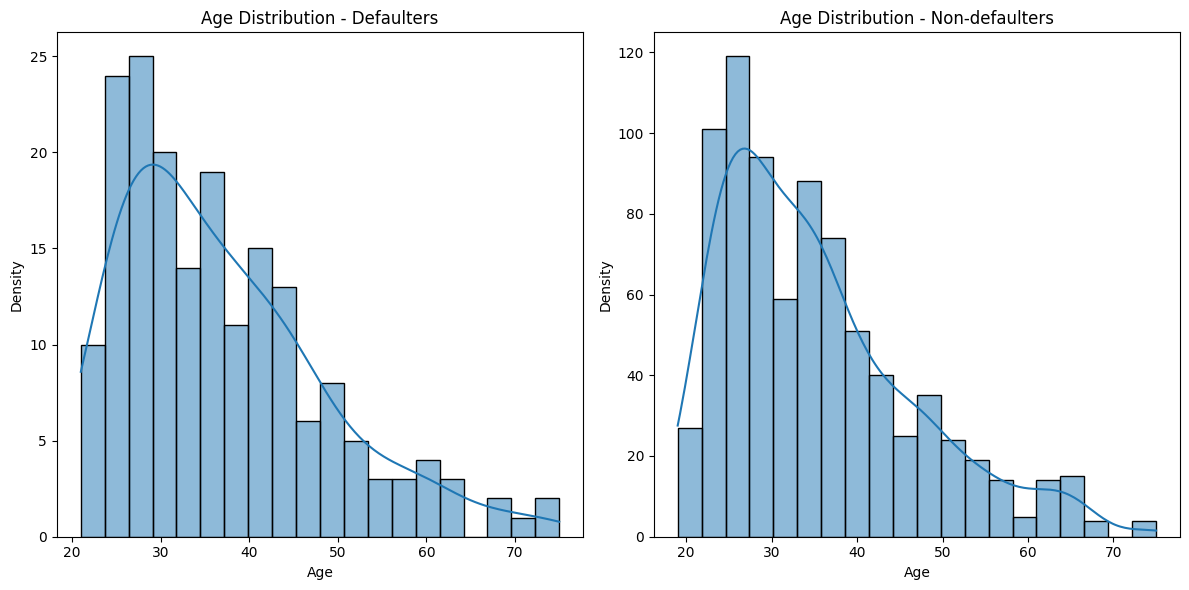

In [15]:
# Separate data for defaulters and non-defaulters
defaulters = df[df['Default'] == 1]
nondefaulters = df[df['Default'] == 0]

# Create subplots to compare age distributions
plt.figure(figsize=(12, 6))

# Defaulters
plt.subplot(1, 2, 1)
sns.histplot(data=defaulters, x='Age', kde=True, bins=20)
plt.title('Age Distribution - Defaulters')
plt.xlabel('Age')
plt.ylabel('Density')

# Non-defaulters
plt.subplot(1, 2, 2)
sns.histplot(data=nondefaulters, x='Age', kde=True, bins=20)
plt.title('Age Distribution - Non-defaulters')
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


Correlation Analysis:

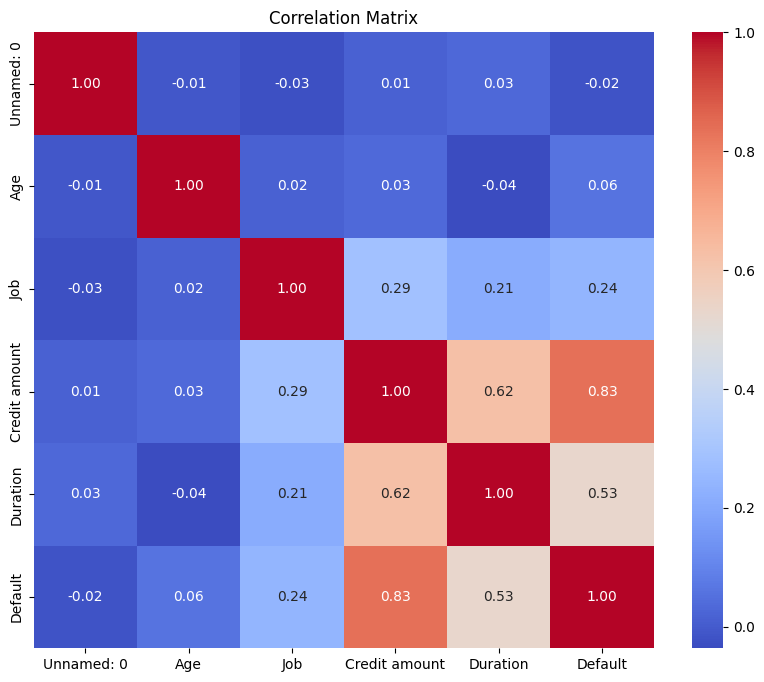

In [16]:
# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Feature Relationships:

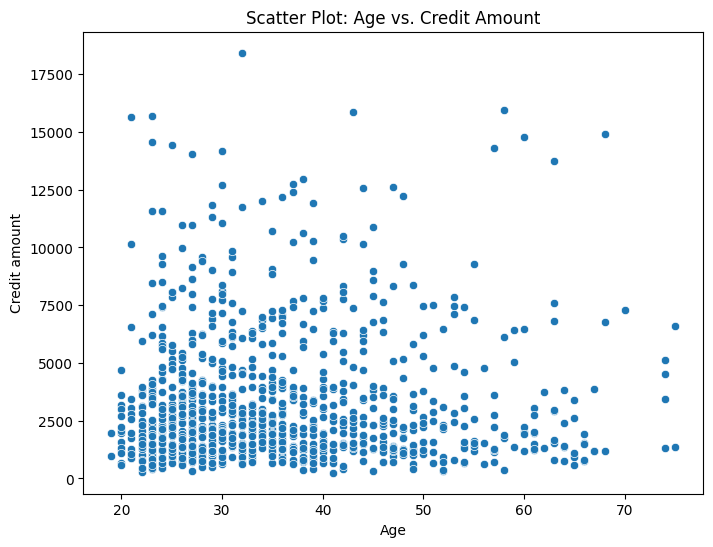

In [17]:
# Scatter plot for two numeric variables (e.g., Age and Credit Amount)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Credit amount')
plt.title('Scatter Plot: Age vs. Credit Amount')
plt.show()


Outlier Detection:

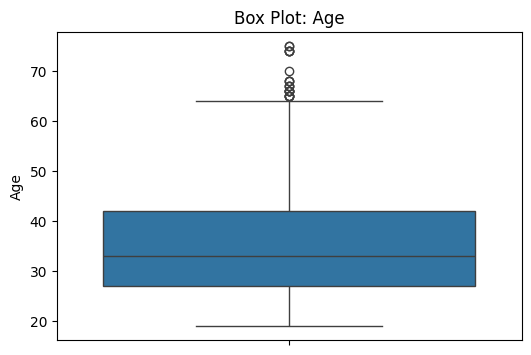

In [18]:
# Box plot for detecting outliers in the 'Age' column
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Age')
plt.title('Box Plot: Age')
plt.show()


Feature Importance:

<Axes: ylabel='None'>

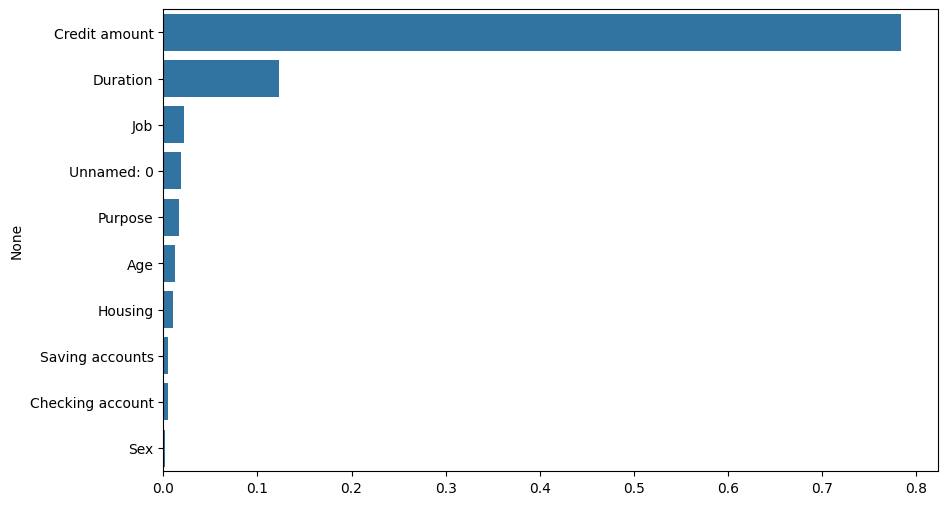

In [19]:
# Select features and target variable
X = df.drop(columns=['Default'])
y = df['Default']

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Fit a RandomForestClassifier to the data
rf = RandomForestClassifier()
rf.fit(X, y)

# Visualize feature importance
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])


Modeling Preparation:

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Visualization of Categorical Variables:

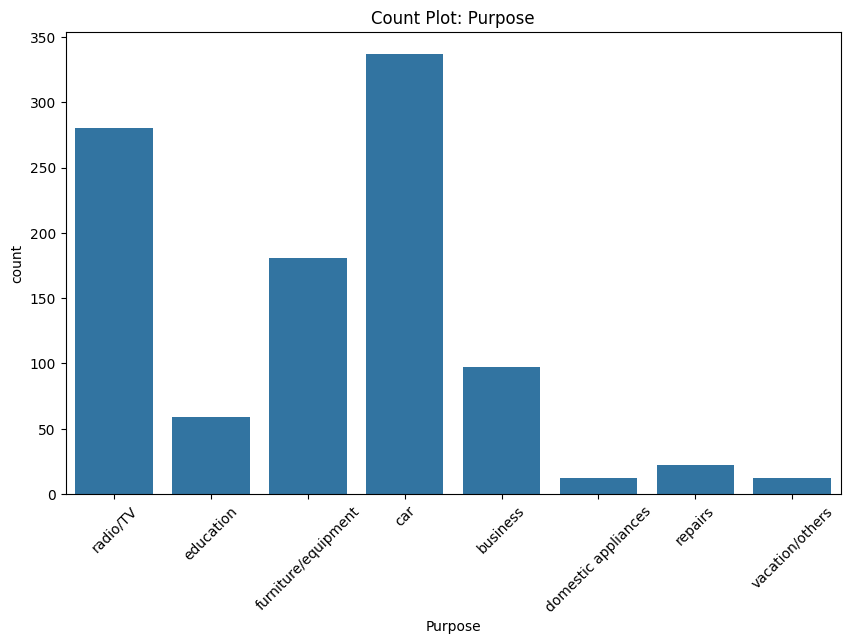

In [21]:
# Count plot for a categorical variable (e.g., 'Purpose')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Purpose')
plt.title('Count Plot: Purpose')
plt.xticks(rotation=45)
plt.show()
